# MLP
Cell line 11 SK.N.SH

This notebook uses
lncRNA, canonical, no middle-exclusion, GMM, learning module.

There were no learn fails during CV.

MCC mean 0.2284

In [1]:
SEED = 43
import tensorflow as tf
tf.random.set_seed(SEED) 
tf.keras.backend.set_floatx('float32')
import numpy as np
np.random.seed(SEED) 
from datetime import datetime
print(datetime.now())

2023-04-29 15:34:27.937259


In [2]:
import sys
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    print('GPU device not found')
else:
    print('Found GPU at: {}'.format(device_name))

try:
    from google.colab import drive
    IN_COLAB = True
    print('Running on CoLab')
    PATH='/content/drive/'
    drive.mount(PATH)
    DATA_DIR=PATH+'My Drive/data/Localization/TrainTest/TrainTest_ver43/'  # must end in "/"
    MODEL_DIR=PATH+'My Drive/data/Localization/Models/'  # must end in "/"
    sys.path.append('/content/drive/My Drive/Colab Notebooks')
except:
    IN_COLAB = False
    DATA_DIR="/"
    MODEL_DIR="/"
print(DATA_DIR)
SAVE_MODEL_FILENAME = None # 'MLP'
SAVE_DESCRIM_FILENAME = None # 'GMM'
LOAD_MODEL_FILENAME = None # 'MLP.0.0..model'
LOAD_DESCRIM_FILENAME = None # 'GMM.0.0.pickle'

GPU device not found
Running on CoLab
Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/


In [3]:
from platform import python_version
print('Python',python_version())
import pandas as pd
import scipy.stats as ss
import pickle
import time # sleep function
from os.path import isfile
from matplotlib import pyplot as plt 
import sklearn   # pip install --upgrade scikit-learn
print('sklearn',sklearn.__version__)

from learning import DataLoader, CrossValidator, Separator, ModelBuilder

K=5
ALPHABET=4**K + 1
EPOCHS=300 
EMBED_DIMEN = 4 # arbitrary hyperparameter
RCI_THRESHOLD_MECHANISM = 'RCI_GMM'  # 'RCI_GMM' 'ZERO' 'THE_MEAN'
RCI_THRESHOLD_VALUE = -1  # use -1 for lncRNA, use 0 for mRNA
BREAK = False   # optionally break after first fold
FILTER_TRAIN        = False
FILTER_TAILS_TRAIN  = False
FILTER_MIDDLE_TRAIN = False
FILTER_TEST         = False
FILTER_TAILS_TEST   = False
FILTER_MIDDLE_TEST  = False
MIDDLE_LOW          = -2   # -2 for lncRNA, -1 for mRNA
MIDDLE_HIGH         = 0    #  0 for lncRNA, +1 for mRNA

REPEATS = 2
FOLDS = 5

Python 3.10.11
sklearn 1.2.2


In [4]:
RCI_FILE_TRAIN = 'train.lncRNA_RCI.all_cell_lines.csv'
RCI_FILE_TEST  = None # 'test.lncRNA_RCI.all_cell_lines.csv'

SEQ_FILE_TRAIN = 'train.canon_lncRNA_transcripts.csv'
SEQ_FILE_TEST  = None # 'test.canon_lncRNA_transcripts.csv'

In [5]:
def get_ordered_list():
    ordered_list = \
    ['A549','H1.hESC','HeLa.S3','HepG2','HT1080',\
      'HUVEC','MCF.7','NCI.H460','NHEK','SK.MEL.5',\
      'SK.N.DZ','SK.N.SH','GM12878','K562','IMR.90']
    return ordered_list
all_cell_lines = get_ordered_list()
EXCLUSIONS = [x for x in range(15) if x!=11]   
print('Exclusions',EXCLUSIONS)

Exclusions [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14]


2023-04-29 15:34:30.322033
Load RCI from /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/train.lncRNA_RCI.all_cell_lines.csv
Number of RCI values loaded 1819
Num RCI: 1819
Load sequence from /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/train.canon_lncRNA_transcripts.csv
Loaded 1819 sequences.

Training # 1 1
2023-04-29 15:34:36.199753
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.1.1.validation_genes.txt
Discriminator is GMM
Means [-3.1045862294029596, -0.11528258732281461]
Variances [2.95055343 2.12554495]
Priors [0.41734147 0.58265853]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
Train 1:0 890:555 61.59%
Computed class weights: {0: 1.3018018018018018, 1: 0.8117977528089888}
Valid 1:0 220:154 58.82%
FIT


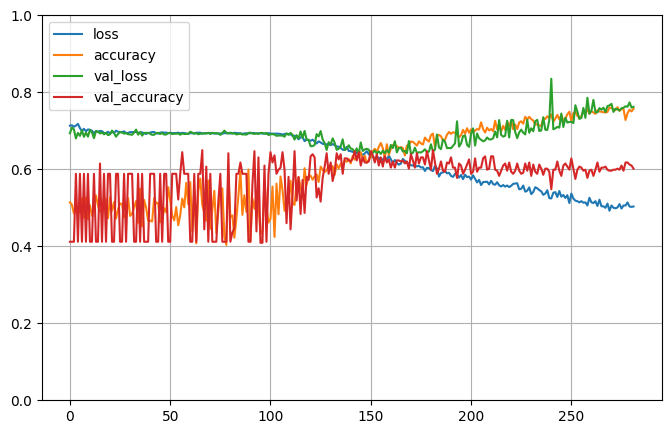


Testing # 1 1
2023-04-29 15:35:53.928771
PREDICT
Test 1:0 220:154 58.82%
Predict 1:0 283:91 75.67%
Test sizes (374, 1025) (374,)
Distrib of scores: 0.6107443 mean 0.17213708 std
Range of scores: 0.065910034 to 0.9199084
Score threshold 0.5
Confusion matrix
 [[ 57  97]
 [ 34 186]]
Normalized matrix
 [[0.15240642 0.25935829]
 [0.09090909 0.4973262 ]]
Extreme scores correct, pos:neg 126 27
Extreme scores incorrect pos:neg 56 9


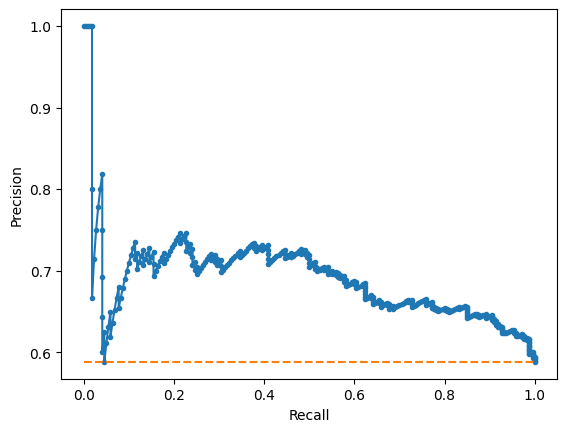

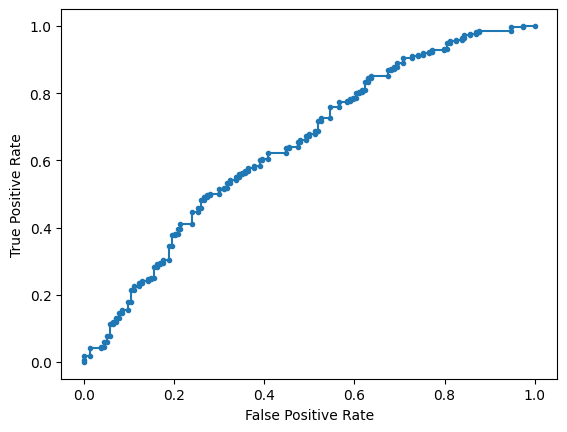

Accuracy: 64.97% Precision: 65.72% Recall: 84.55%
F1: 73.96% MCC: 0.2473
AUPRC: 69.10% AUROC: 64.51%
 accuracy [64.97326203208557]
 precision [65.7243816254417]
 recall [84.54545454545455]
 F1 [73.95626242544732]
 MCC [0.24727211856275513]
 AUPRC [69.0961663411202]
 AUROC [64.51003541912634]

Training # 1 2
2023-04-29 15:35:54.559556
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.1.2.validation_genes.txt
Discriminator is GMM
Means [-3.177197887332342, -0.08248928670673994]
Variances [2.75650822 1.98143501]
Priors [0.42825341 0.57174659]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
Train 1:0 876:587 59.88%
Computed class weights: {0: 1.246166950596252, 1: 0.8350456621004566}
Valid 1:0 220:136 61.80%
FIT


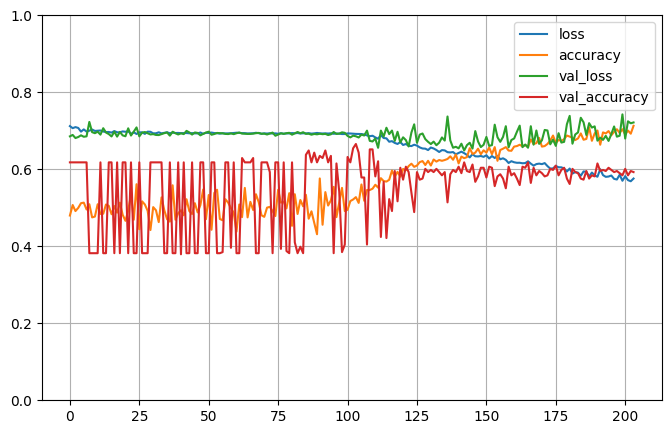


Testing # 1 2
2023-04-29 15:37:18.881081
PREDICT
Test 1:0 220:136 61.80%
Predict 1:0 335:21 94.10%
Test sizes (356, 1025) (356,)
Distrib of scores: 0.51235354 mean 0.007247944 std
Range of scores: 0.49109563 to 0.5373015
Score threshold 0.5
Confusion matrix
 [[ 19 117]
 [  2 218]]
Normalized matrix
 [[0.05337079 0.32865169]
 [0.00561798 0.61235955]]
Extreme scores correct, pos:neg 0 0
Extreme scores incorrect pos:neg 0 0


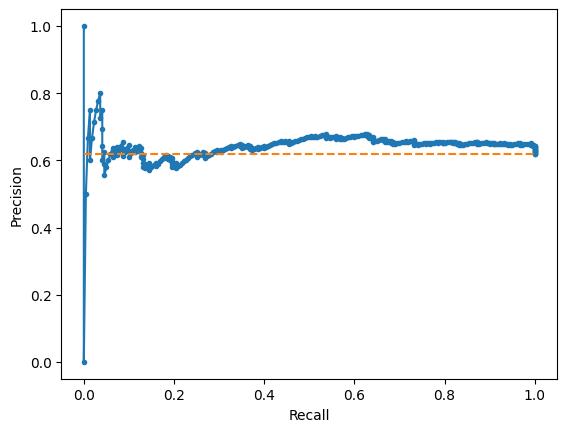

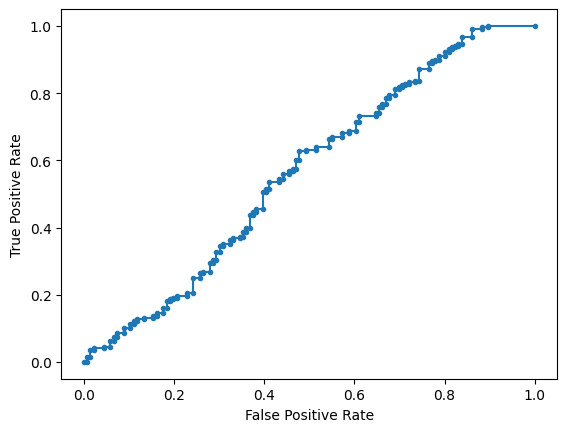

Accuracy: 66.57% Precision: 65.07% Recall: 99.09%
F1: 78.56% MCC: 0.2694
AUPRC: 64.27% AUROC: 56.43%
 accuracy [66.57303370786516]
 precision [65.07462686567163]
 recall [99.0909090909091]
 F1 [78.55855855855856]
 MCC [0.2693653378182009]
 AUPRC [64.2663325049491]
 AUROC [56.42713903743316]

Training # 1 3
2023-04-29 15:37:19.465288
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.1.3.validation_genes.txt
Discriminator is GMM
Means [-3.1260401432670752, -0.09938928983896463]
Variances [3.10341293 2.10323195]
Priors [0.42880507 0.57119493]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
Train 1:0 871:582 59.94%
Computed class weights: {0: 1.2482817869415808, 1: 0.8340987370838117}
Valid 1:0 229:137 62.57%
FIT


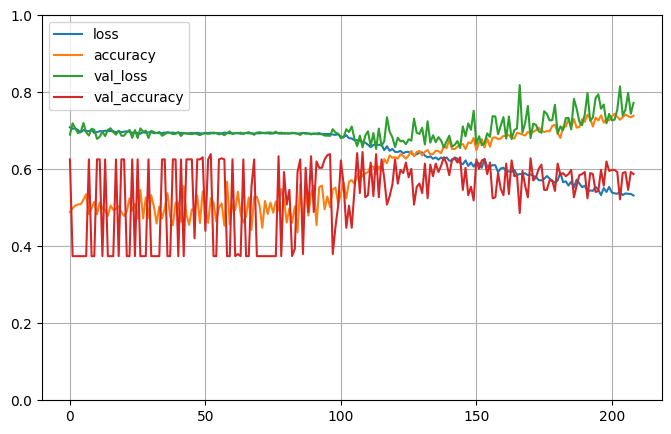


Testing # 1 3
2023-04-29 15:38:17.888597
PREDICT
Test 1:0 229:137 62.57%
Predict 1:0 293:73 80.05%
Test sizes (366, 1025) (366,)
Distrib of scores: 0.56071156 mean 0.07625003 std
Range of scores: 0.31174177 to 0.72004676
Score threshold 0.5
Confusion matrix
 [[ 40  97]
 [ 33 196]]
Normalized matrix
 [[0.10928962 0.26502732]
 [0.09016393 0.53551913]]
Extreme scores correct, pos:neg 31 2
Extreme scores incorrect pos:neg 9 1


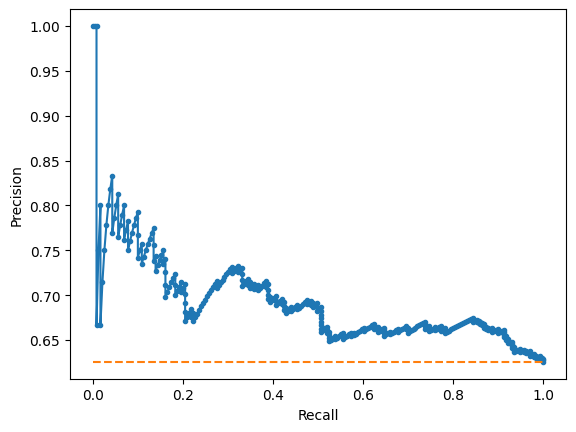

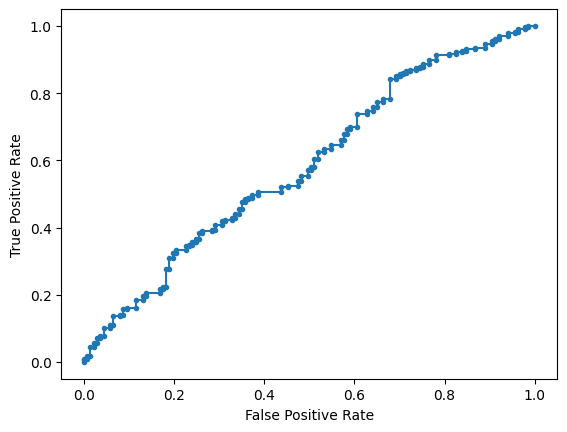

Accuracy: 64.48% Precision: 66.89% Recall: 85.59%
F1: 75.10% MCC: 0.1791
AUPRC: 69.19% AUROC: 58.58%
 accuracy [64.48087431693989]
 precision [66.89419795221842]
 recall [85.58951965065502]
 F1 [75.09578544061303]
 MCC [0.1790816583936354]
 AUPRC [69.1896222988144]
 AUROC [58.58222038058203]

Training # 1 4
2023-04-29 15:38:18.529320
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.1.4.validation_genes.txt
Discriminator is GMM
Means [-3.054196277445781, -0.09418993392958926]
Variances [2.93413755 2.04617581]
Priors [0.43417241 0.56582759]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
Train 1:0 871:586 59.78%
Computed class weights: {0: 1.243174061433447, 1: 0.8363949483352469}
Valid 1:0 215:147 59.39%
FIT


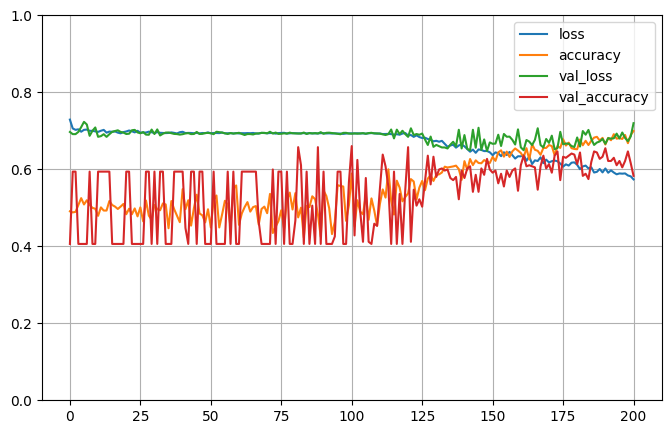


Testing # 1 4
2023-04-29 15:39:45.638225
PREDICT
Test 1:0 215:147 59.39%
Predict 1:0 294:68 81.22%
Test sizes (362, 1025) (362,)
Distrib of scores: 0.5008969 mean 0.0010142024 std
Range of scores: 0.49778906 to 0.50352514
Score threshold 0.5
Confusion matrix
 [[ 46 101]
 [ 22 193]]
Normalized matrix
 [[0.12707182 0.27900552]
 [0.06077348 0.53314917]]
Extreme scores correct, pos:neg 0 0
Extreme scores incorrect pos:neg 0 0


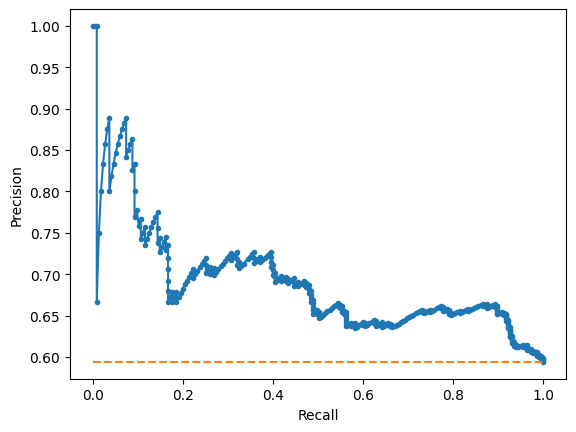

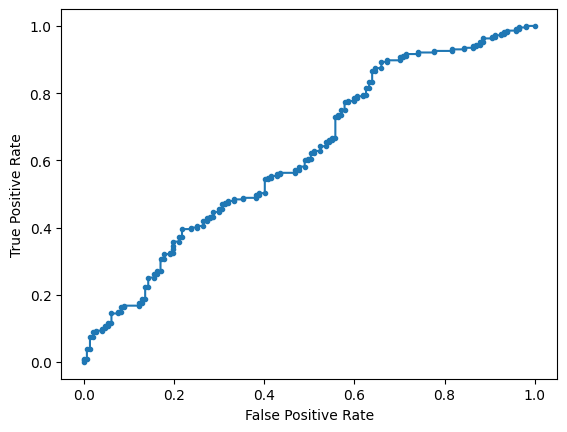

Accuracy: 66.02% Precision: 65.65% Recall: 89.77%
F1: 75.83% MCC: 0.2648
AUPRC: 69.06% AUROC: 61.95%
 accuracy [66.02209944751381]
 precision [65.64625850340136]
 recall [89.76744186046511]
 F1 [75.83497053045186]
 MCC [0.2647934843345013]
 AUPRC [69.05878310362512]
 AUROC [61.95064072140484]

Training # 1 5
2023-04-29 15:39:46.282698
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.1.5.validation_genes.txt
Discriminator is GMM
Means [-3.14747702364686, -0.17846950698681263]
Variances [2.83425862 2.02311769]
Priors [0.41366066 0.58633934]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
Train 1:0 903:555 61.93%
Computed class weights: {0: 1.3135135135135134, 1: 0.8073089700996677}
Valid 1:0 222:139 61.50%
FIT


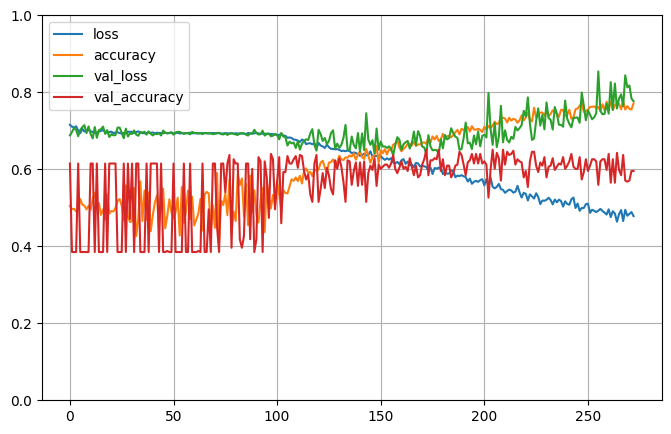


Testing # 1 5
2023-04-29 15:40:59.501696
PREDICT
Test 1:0 222:139 61.50%
Predict 1:0 246:115 68.14%
Test sizes (361, 1025) (361,)
Distrib of scores: 0.58185565 mean 0.17291091 std
Range of scores: 0.106187 to 0.91513604
Score threshold 0.5
Confusion matrix
 [[ 64  75]
 [ 51 171]]
Normalized matrix
 [[0.17728532 0.20775623]
 [0.14127424 0.47368421]]
Extreme scores correct, pos:neg 112 27
Extreme scores incorrect pos:neg 42 13


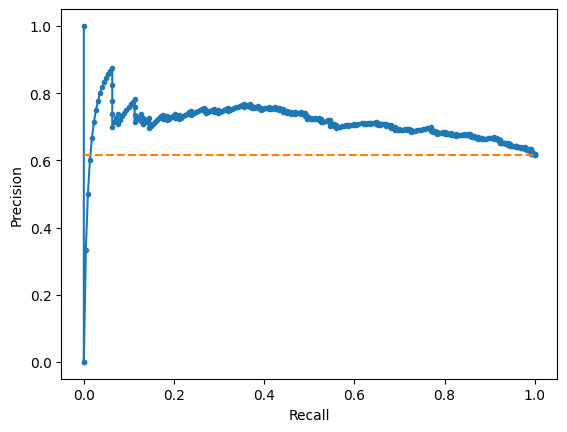

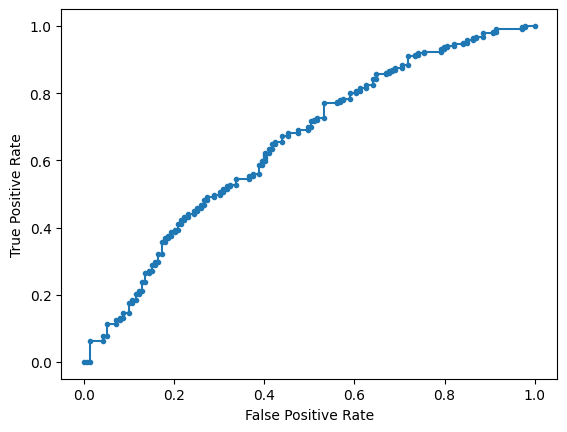

Accuracy: 65.10% Precision: 69.51% Recall: 77.03%
F1: 73.08% MCC: 0.2409
AUPRC: 71.07% AUROC: 64.89%
 accuracy [65.09695290858726]
 precision [69.51219512195121]
 recall [77.02702702702703]
 F1 [73.07692307692307]
 MCC [0.24094539581486324]
 AUPRC [71.06612367531966]
 AUROC [64.89403072136885]

Training # 2 1
2023-04-29 15:41:00.140211
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.2.1.validation_genes.txt
Discriminator is GMM
Means [-3.0591867117888287, -0.08044177750033008]
Variances [2.9026837  2.16538872]
Priors [0.42828653 0.57171347]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
Train 1:0 882:579 60.37%
Computed class weights: {0: 1.261658031088083, 1: 0.8282312925170068}
Valid 1:0 211:147 58.94%
FIT


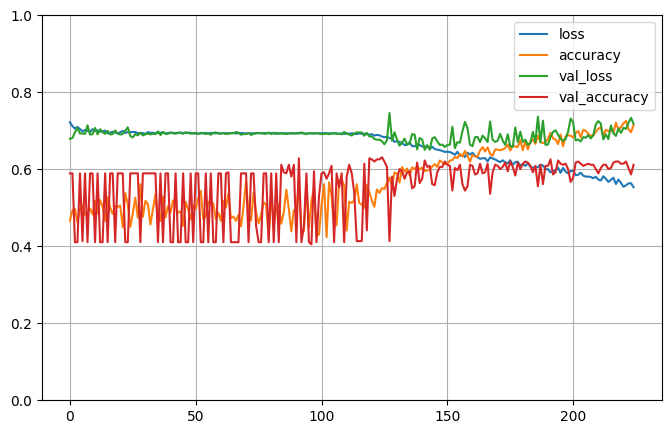


Testing # 2 1
2023-04-29 15:42:01.567938
PREDICT
Test 1:0 211:147 58.94%
Predict 1:0 303:55 84.64%
Test sizes (358, 1025) (358,)
Distrib of scores: 0.53207463 mean 0.02948869 std
Range of scores: 0.44791475 to 0.6132605
Score threshold 0.5
Confusion matrix
 [[ 35 112]
 [ 20 191]]
Normalized matrix
 [[0.09776536 0.31284916]
 [0.05586592 0.53351955]]
Extreme scores correct, pos:neg 0 0
Extreme scores incorrect pos:neg 0 0


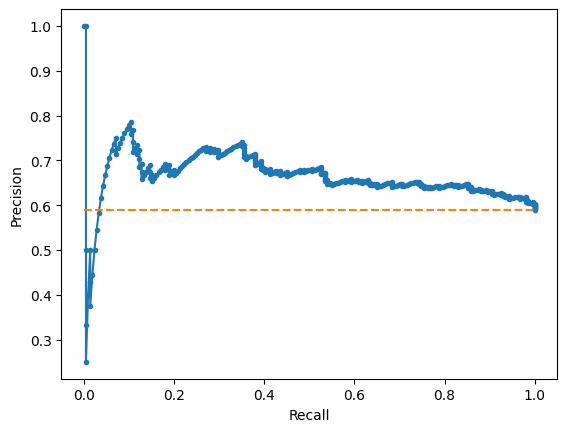

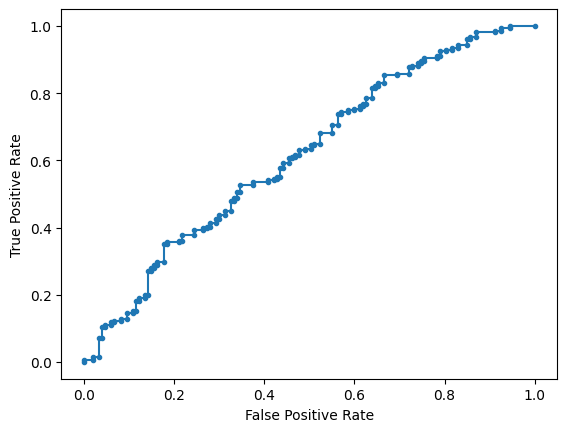

Accuracy: 63.13% Precision: 63.04% Recall: 90.52%
F1: 74.32% MCC: 0.1955
AUPRC: 66.47% AUROC: 61.61%
 accuracy [63.128491620111724]
 precision [63.03630363036304]
 recall [90.52132701421802]
 F1 [74.31906614785994]
 MCC [0.19551010604844993]
 AUPRC [66.47294516687575]
 AUROC [61.61137440758293]

Training # 2 2
2023-04-29 15:42:02.485543
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.2.2.validation_genes.txt
Discriminator is GMM
Means [-0.1675215909932646, -3.123464625282689]
Variances [2.04268765 2.97615537]
Priors [0.58230855 0.41769145]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
Train 1:0 913:565 61.77%
Computed class weights: {0: 1.3079646017699116, 1: 0.8094194961664841}
Valid 1:0 209:132 61.29%
FIT


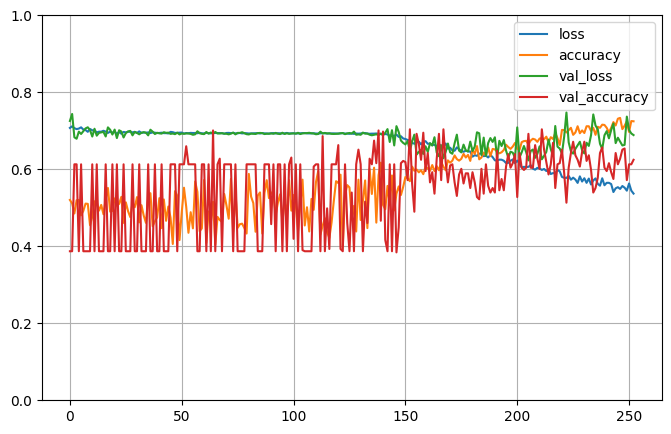


Testing # 2 2
2023-04-29 15:43:26.592115
PREDICT
Test 1:0 209:132 61.29%
Predict 1:0 278:63 81.52%
Test sizes (341, 1025) (341,)
Distrib of scores: 0.55919164 mean 0.063086815 std
Range of scores: 0.39144737 to 0.6981738
Score threshold 0.5
Confusion matrix
 [[ 47  85]
 [ 16 193]]
Normalized matrix
 [[0.13782991 0.24926686]
 [0.04692082 0.5659824 ]]
Extreme scores correct, pos:neg 12 0
Extreme scores incorrect pos:neg 7 0


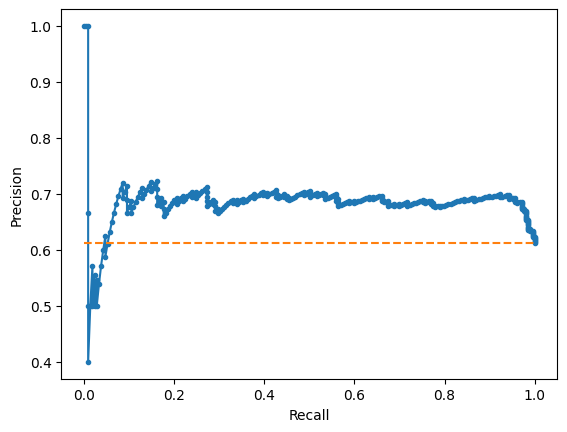

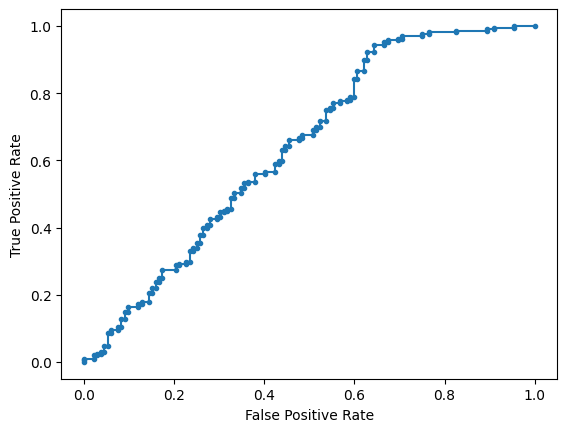

Accuracy: 70.38% Precision: 69.42% Recall: 92.34%
F1: 79.26% MCC: 0.3508
AUPRC: 68.54% AUROC: 63.88%
 accuracy [70.38123167155426]
 precision [69.42446043165468]
 recall [92.34449760765551]
 F1 [79.26078028747433]
 MCC [0.3507986567895098]
 AUPRC [68.53830289425669]
 AUROC [63.879222850514715]

Training # 2 3
2023-04-29 15:43:27.191559
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.2.3.validation_genes.txt
Discriminator is GMM
Means [-0.12189979692150421, -3.1870168968814214]
Variances [1.91325327 2.80171796]
Priors [0.57939784 0.42060216]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
Train 1:0 872:571 60.43%
Computed class weights: {0: 1.2635726795096323, 1: 0.8274082568807339}
Valid 1:0 237:139 63.03%
FIT


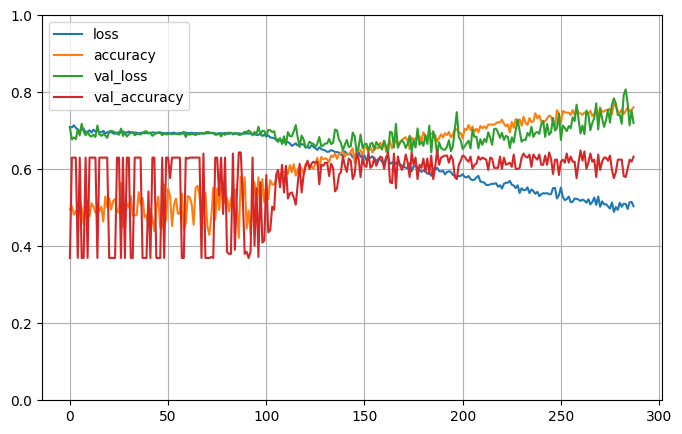


Testing # 2 3
2023-04-29 15:44:51.827597
PREDICT
Test 1:0 237:139 63.03%
Predict 1:0 319:57 84.84%
Test sizes (376, 1025) (376,)
Distrib of scores: 0.6506043 mean 0.15953667 std
Range of scores: 0.052401215 to 0.8921523
Score threshold 0.5
Confusion matrix
 [[ 32 107]
 [ 25 212]]
Normalized matrix
 [[0.08510638 0.28457447]
 [0.06648936 0.56382979]]
Extreme scores correct, pos:neg 160 14
Extreme scores incorrect pos:neg 70 9


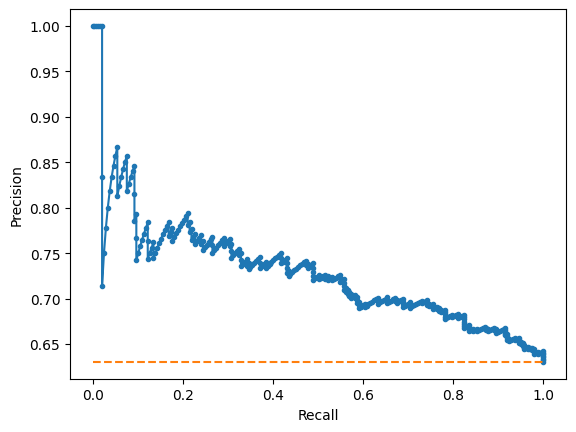

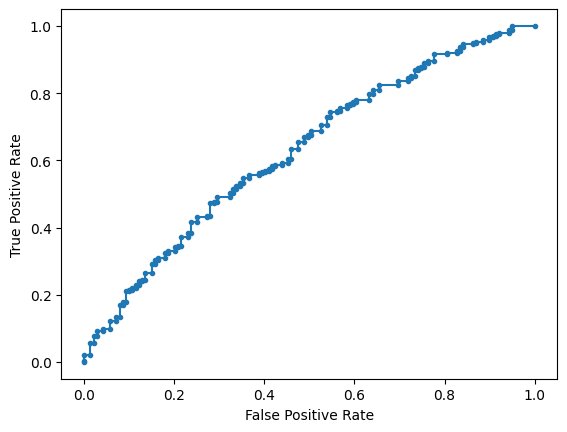

Accuracy: 64.89% Precision: 66.46% Recall: 89.45%
F1: 76.26% MCC: 0.1679
AUPRC: 72.89% AUROC: 62.71%
 accuracy [64.8936170212766]
 precision [66.4576802507837]
 recall [89.45147679324894]
 F1 [76.25899280575538]
 MCC [0.16788882853056386]
 AUPRC [72.89217006580024]
 AUROC [62.71134990741584]

Training # 2 4
2023-04-29 15:44:52.501127
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.2.4.validation_genes.txt
Discriminator is GMM
Means [-3.1695021281275992, -0.050124641222850735]
Variances [2.78425441 2.0164457 ]
Priors [0.42799221 0.57200779]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
Train 1:0 867:575 60.12%
Computed class weights: {0: 1.2539130434782608, 1: 0.831603229527105}
Valid 1:0 226:151 59.95%
FIT


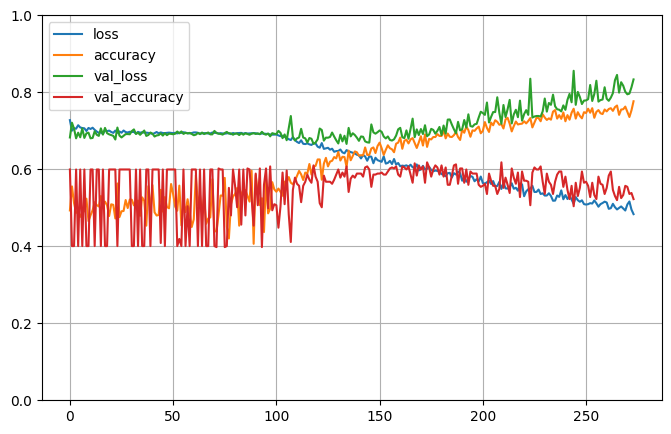


Testing # 2 4
2023-04-29 15:46:09.441413
PREDICT
Test 1:0 226:151 59.95%
Predict 1:0 258:119 68.44%
Test sizes (377, 1025) (377,)
Distrib of scores: 0.5692273 mean 0.17315279 std
Range of scores: 0.055102266 to 0.9167334
Score threshold 0.5
Confusion matrix
 [[ 63  88]
 [ 56 170]]
Normalized matrix
 [[0.16710875 0.23342175]
 [0.14854111 0.45092838]]
Extreme scores correct, pos:neg 97 26
Extreme scores incorrect pos:neg 46 26


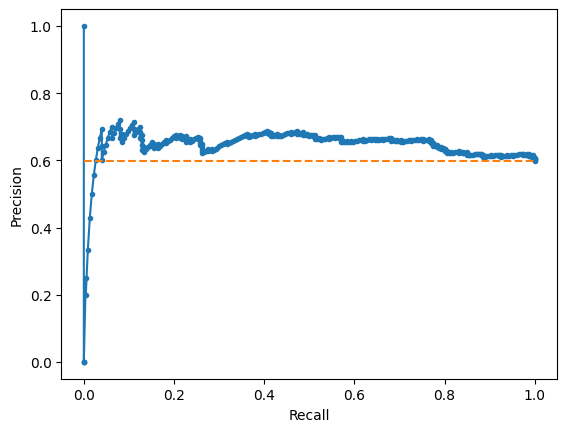

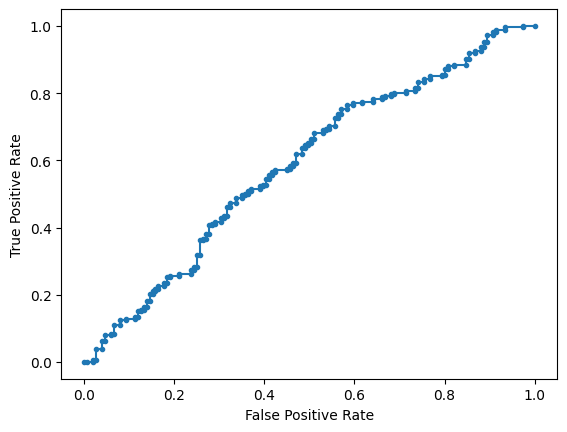

Accuracy: 61.80% Precision: 65.89% Recall: 75.22%
F1: 70.25% MCC: 0.1786
AUPRC: 64.64% AUROC: 58.76%
 accuracy [61.80371352785146]
 precision [65.89147286821705]
 recall [75.22123893805309]
 F1 [70.24793388429752]
 MCC [0.17862903844398892]
 AUPRC [64.6426836871433]
 AUROC [58.76457832737502]

Training # 2 5
2023-04-29 15:46:10.317887
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.2.5.validation_genes.txt
Discriminator is GMM
Means [-3.1178371891058445, -0.1509062276585211]
Variances [3.01603137 2.12105802]
Priors [0.42086029 0.57913971]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
Train 1:0 892:560 61.43%
Computed class weights: {0: 1.2964285714285715, 1: 0.8139013452914798}
Valid 1:0 223:144 60.76%
FIT


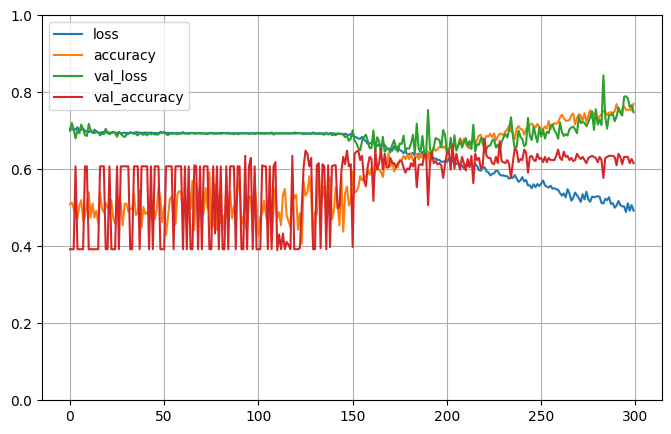


Testing # 2 5
2023-04-29 15:47:31.203109
PREDICT
Test 1:0 223:144 60.76%
Predict 1:0 228:139 62.13%
Test sizes (367, 1025) (367,)
Distrib of scores: 0.57297546 mean 0.2632796 std
Range of scores: 0.0030390962 to 0.98578435
Score threshold 0.5
Confusion matrix
 [[ 71  73]
 [ 68 155]]
Normalized matrix
 [[0.19346049 0.19891008]
 [0.1852861  0.42234332]]
Extreme scores correct, pos:neg 127 45
Extreme scores incorrect pos:neg 46 35


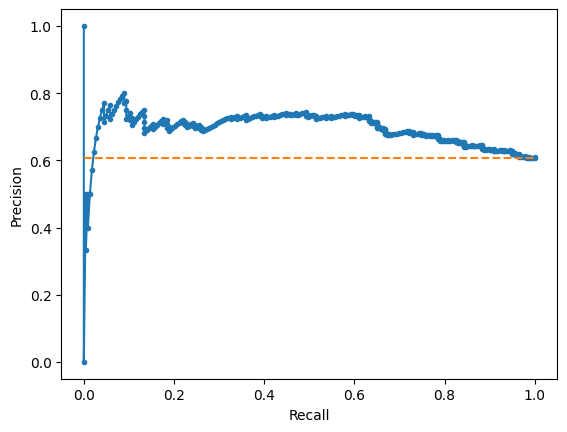

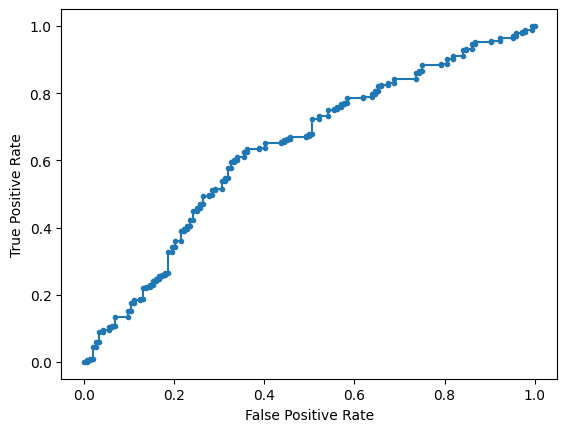

Accuracy: 61.58% Precision: 67.98% Recall: 69.51%
F1: 68.74% MCC: 0.1894
AUPRC: 69.33% AUROC: 63.43%
 accuracy [61.58038147138964]
 precision [67.98245614035088]
 recall [69.50672645739911]
 F1 [68.73614190687361]
 MCC [0.1893652713548226]
 AUPRC [69.33292350961334]
 AUROC [63.42800199302442]
2023-04-29 15:47:32.123467


In [6]:
print(datetime.now())

accuracy=[]
precision=[]
recall=[]
f1=[]
mcc=[]
auprc=[]
auroc=[]

loader = DataLoader(K,ALPHABET)
filepath = DATA_DIR+RCI_FILE_TRAIN
print("Load RCI from",filepath)
gene_to_rci = loader.load_gene_rci_values(filepath,EXCLUSIONS)
print('Num RCI:', len(gene_to_rci.keys()))
filepath = DATA_DIR+SEQ_FILE_TRAIN
print('Load sequence from',filepath)
allids,allseq = loader.load_spectra(filepath)  # for MLP (load_sequence() for CNN)
print('Loaded',len(allseq),'sequences.')
test_gene_to_rci = None
test_allids = None
test_allseq = None
if SEQ_FILE_TEST is not None:
    # Train on the entire train set (no cross-validation).
    # Evaluate with the test files.
    test_loader = DataLoader(K,ALPHABET)
    filepath = DATA_DIR+RCI_FILE_TEST
    print("Load RCI from",filepath)
    test_gene_to_rci = test_loader.load_gene_rci_values(filepath,EXCLUSIONS)
    print('Num RCI:', len(test_gene_to_rci.keys()))
    filepath = DATA_DIR+SEQ_FILE_TEST
    print('Load sequence from',filepath)
    test_allids,test_allseq = test_loader.load_spectra(filepath)
    print('Loaded',len(test_allseq),'sequences.')

for repeat in range(REPEATS):
    for fold in range(FOLDS):
        show_r = repeat+1  # display one-based counting
        show_f = fold+1    # display one-based counting

        print()
        print("Training #",show_r,show_f)
        print(datetime.now())
        builder = ModelBuilder(ALPHABET)
        cvdo = CrossValidator(EPOCHS,RCI_THRESHOLD_VALUE)
        cvdo.set_model_builder(builder)
        cvdo.set_threshold_mechanism(RCI_THRESHOLD_MECHANISM)
        if SEQ_FILE_TEST is None:
            # Train on 80% and evaluate on 20%.
            separator = Separator()
            separator.set_middle(FILTER_TEST,FILTER_TAILS_TEST,FILTER_MIDDLE_TEST,\
                                 FILTER_TRAIN,FILTER_TAILS_TRAIN,FILTER_MIDDLE_TRAIN,\
                                 MIDDLE_LOW,MIDDLE_HIGH)
            separator.load(DATA_DIR,show_r,show_f)
            separator.process(allids,allseq,gene_to_rci)
            train_allids,test_allids = separator.get_ids()
            train_allseq,test_allseq = separator.get_seq()
            train_gene_to_rci,test_gene_to_rci = separator.get_rci()
            cvdo.train_new_model(
                train_allids,train_allseq,train_gene_to_rci,
                test_allids,test_allseq,test_gene_to_rci)
            if SAVE_MODEL_FILENAME is not None:
                filename1 = f"{SAVE_MODEL_FILENAME}.{show_r}.{show_f}.model"
                filename2 = f"{SAVE_DESCRIM_FILENAME}.{show_r}.{show_f}.pickle"
                cvdo.save_model(filename1,filename2)
        else:
            # Train on the entire train set (no cross-validation).
            # Evaluate with the test files.
            train_allids = allids
            train_allseq = allseq
            train_gene_to_rci = gene_to_rci
            BREAK = True
            filename1 = LOAD_MODEL_FILENAME
            filename2 = LOAD_DESCRIM_FILENAME
            cvdo.load_model(filename1,filename2)
            #cvdo.train_new_model(
            #    train_allids,train_allseq,train_gene_to_rci,
            #    None,None,None)

        print()
        print("Testing #",show_r,show_f)
        print(datetime.now())
        cvdo.reset_statistics()
        cvdo.test_without_training(
            test_allids,test_allseq,test_gene_to_rci)
        cv_accuracy,cv_precision,cv_recall,cv_f1,cv_mcc,cv_auprc,cv_auroc=\
            cvdo.get_statistics()

        print(" accuracy" ,  cv_accuracy)
        print(" precision" , cv_precision)
        print(" recall" ,    cv_recall)
        print(" F1" ,        cv_f1)
        print(" MCC" ,       cv_mcc)
        print(" AUPRC" ,     cv_auprc)
        print(" AUROC" ,     cv_auroc)

        accuracy.append(cv_accuracy)
        precision.append(cv_precision)
        recall.append(cv_recall)
        f1.append(cv_f1)
        mcc.append(cv_mcc)
        auprc.append(cv_auprc)
        auroc.append(cv_auroc)
        if BREAK: break
    if BREAK: break
print(datetime.now())

In [7]:
def STD (values):
    # ddof=1 reduces bias when extrapolating from sample to population
    return np.std(values,ddof=1)

print(" accuracy mean %.2f%% std %.2f" %  (np.mean(accuracy),  STD(accuracy)))
print(" precision mean %.2f%% std %.2f" % (np.mean(precision), STD(precision)))
print(" recall mean %.2f%% std %.2f" %    (np.mean(recall),    STD(recall)))
print(" F1 mean %.2f%% std %.2f" %        (np.mean(f1),        STD(f1)))
print(" MCC mean %.4f std %.4f" %       (np.mean(mcc),       STD(mcc)))
print(" AUPRC mean %.2f%% std %.2f" %     (np.mean(auprc),     STD(auprc)))
print(" AUROC mean %.2f%% std %.2f" %     (np.mean(auroc),     STD(auroc)))

print(" accuracy"  , accuracy)
print(" precision" , precision)
print(" recall"    , recall)
print(" F1"        , f1)
print(" MCC"       , mcc)
print(" AUPRC"     , auprc)
print(" AUROC"     , auroc)



 accuracy mean 64.89% std 2.54
 precision mean 66.56% std 1.99
 recall mean 85.31% std 8.97
 F1 mean 74.53% std 3.30
 MCC mean 0.2284 std 0.0574
 AUPRC mean 68.46% std 2.68
 AUROC mean 61.68% std 2.85
 accuracy [[64.97326203208557], [66.57303370786516], [64.48087431693989], [66.02209944751381], [65.09695290858726], [63.128491620111724], [70.38123167155426], [64.8936170212766], [61.80371352785146], [61.58038147138964]]
 precision [[65.7243816254417], [65.07462686567163], [66.89419795221842], [65.64625850340136], [69.51219512195121], [63.03630363036304], [69.42446043165468], [66.4576802507837], [65.89147286821705], [67.98245614035088]]
 recall [[84.54545454545455], [99.0909090909091], [85.58951965065502], [89.76744186046511], [77.02702702702703], [90.52132701421802], [92.34449760765551], [89.45147679324894], [75.22123893805309], [69.50672645739911]]
 F1 [[73.95626242544732], [78.55855855855856], [75.09578544061303], [75.83497053045186], [73.07692307692307], [74.31906614785994], [79.26078